IMPORTING NECESSARIES LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from matplotlib.patches import Patch
import matplotlib.patches as mpatches


IMPORTING THE DATASET

In [2]:
df = pd.read_csv("ecommerce_customer_behavior_dataset.csv")
df.head(3)

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium


CHECKING NULL VALUES

In [3]:
df.isnull().any()

Customer ID                    False
Age                            False
Gender                         False
Location                       False
Product Category               False
Purchase Amount ($)            False
Time Spent on Website (min)    False
Device Type                    False
Payment Method                 False
Discount Availed               False
Number of Items Purchased      False
Return Customer                False
Review Score (1-5)             False
Delivery Time (days)           False
Subscription Status            False
Customer Satisfaction          False
dtype: bool

CHECKING DUPLICATES ROWS

In [4]:
df[df.duplicated()==1]

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction


CHECKING DATATYPES OF THE COLUMNS

In [5]:
df.dtypes

Customer ID                      int64
Age                              int64
Gender                          object
Location                        object
Product Category                object
Purchase Amount ($)            float64
Time Spent on Website (min)      int64
Device Type                     object
Payment Method                  object
Discount Availed                  bool
Number of Items Purchased        int64
Return Customer                   bool
Review Score (1-5)               int64
Delivery Time (days)             int64
Subscription Status             object
Customer Satisfaction           object
dtype: object

DATAFRAME HAS NO MISSING VALUES, DUPLICATES VALUES NOR ANY WRONGLY PRESENTED COLUMNS DATATYPES.

LEVEL 1: BASIC INSIGHTS

Q 1: Find Mean, Median, and Mode (Age) 

In [6]:
print(f"Mean: {df['Age'].mean()}, Median: {df['Age'].median()}, Mode: {df['Age'].mode()[0]}")

Mean: 43.7899, Median: 44.0, Mode: 51


VISUALIZATION OF THIS OUTPUT

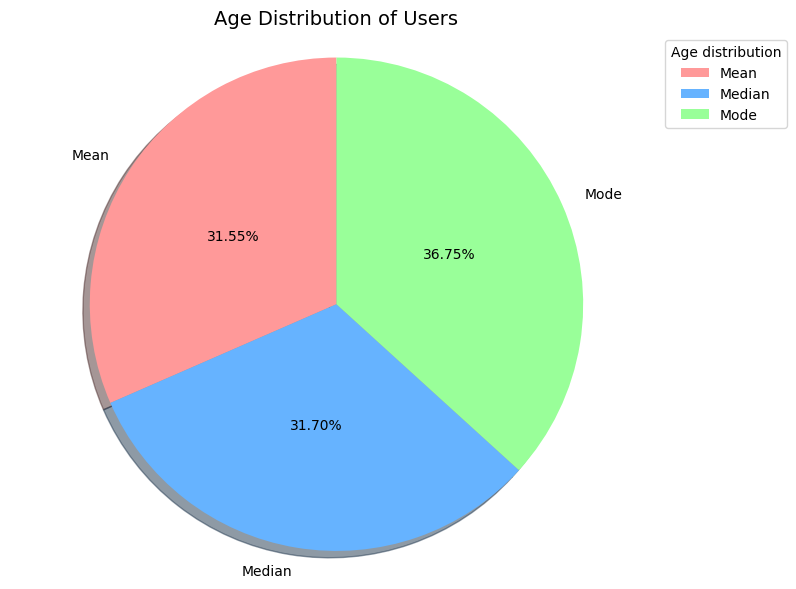

In [3]:
# making a list of average of mean, median and mode
age = [df['Age'].mean(), df['Age'].median(), df['Age'].mode()[0]]

perameter = ['Mean', 'Median', 'Mode']
plt.figure(figsize=(8, 6))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
plt.pie(age, 
        labels=perameter, 
        autopct='%1.2f%%', 
        startangle=90, 
        colors=colors,
        pctdistance = 0.5,
        #explode=explode,
        shadow=True)
plt.legend(perameter, title="Age distribution", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.title('Age Distribution of Users', fontsize=14)
plt.axis('equal')  # Makes the pie chart circular
plt.tight_layout()
plt.savefig('q1.png')
plt.show()

Q 2: Find variance, standard deviation, and z-score (Purchase Amount)

In [8]:
# Variance
df['Purchase Amount ($)'].var()

np.float64(81932.24073019299)

In [9]:
# Standard Deviation
df['Purchase Amount ($)'].std()

np.float64(286.23808399685913)

In [17]:
# Z-score
z_scores = (df['Purchase Amount ($)'] - df['Purchase Amount ($)'].mean()) / df['Purchase Amount ($)'].std()
z_scores

0      -1.052804
1       0.531192
2       1.606207
3      -0.063942
4      -1.259869
          ...   
9995   -1.413727
9996    1.026829
9997    1.104946
9998   -1.638330
9999   -0.944817
Name: Purchase Amount ($), Length: 10000, dtype: float64

Q 3: What are the top three product categories based on the number of purchases?

In [18]:
df.groupby('Product Category')['Purchase Amount ($)'].sum().sort_values(ascending=False).head(3)

Product Category
Toys     665535.38
Books    664338.38
Home     647106.92
Name: Purchase Amount ($), dtype: float64

In [19]:
df['Product Category'].unique()

array(['Toys', 'Sports', 'Home', 'Beauty', 'Books', 'Groceries',
       'Electronics', 'Clothing'], dtype=object)

MKAING TWO SEREIS LISTS OUT OF ABOVE GROUPBY FUNCTION

In [20]:
grouped = df.groupby('Product Category')['Purchase Amount ($)'].sum().sort_values(ascending=False).head(3)

#creating two series lists for visual presentation
product = pd.Series(grouped.index)
avg = pd.Series(grouped.values)

VISUALISATION FOR BETTER UNDERSTANDING

<Figure size 900x900 with 0 Axes>

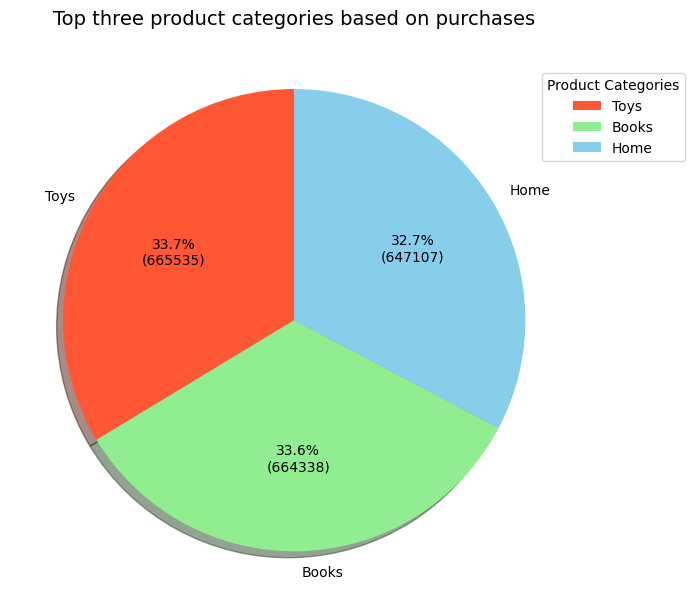

In [23]:
# pie visualization of this output
plt.figure(figsize=(9, 9))
colors = ['#FF5733', 'lightgreen', 'skyblue']


def func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{pct:.1f}%\n({absolute})"

plt.figure(figsize=(7, 6))
plt.pie(avg, 
        labels=product, 
         autopct=lambda pct: func(pct, avg), 
        startangle=90, 
        colors=colors,
        shadow=True,
       labeldistance=1.09)

plt.title("Top three product categories based on purchases", fontsize=14, pad=30)
plt.axis('equal')  # Makes the pie chart circular

# Add legend
plt.legend(product, title="Product Categories", loc="upper right", bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()

VISUALIZING BY BAR PLOT

In [24]:
grouped = df.groupby('Product Category')['Purchase Amount ($)'].sum().sort_values(ascending=False)

#creating two series lists for visual presentation
product1 = pd.Series(grouped.index)
avg1 = pd.Series(grouped.values)

BAR VISUALIZATOIN

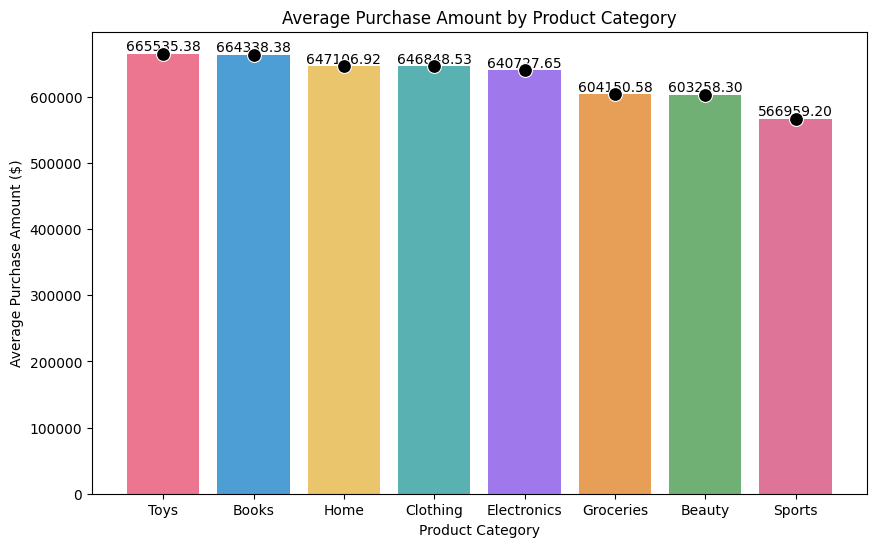

In [25]:
# Plotting bar chart with points on top of each bar

plt.figure(figsize=(10, 6))
sns.barplot(x=product1, y=avg1, hue=product1, palette=['#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0', '#9966FF', '#FF9F40', '#66BB6A', '#F06292'], legend=False)
sns.scatterplot(x=product1, y=avg1, color='black', s=100, marker='o', zorder=10)  # Adding points on top
for i, value in enumerate(avg1):
    plt.text(i, value + 10, f'{value:.2f}', ha='center', va='bottom', fontsize=10)  # Adding value labels
plt.title('Average Purchase Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Amount ($)')
# plt.xticks(rotation=45)
plt.savefig('purchase_amount_by_category.png')
plt.show()

MAKING BAR CHART AND A PIE CHART SIDE BY SIDE FOR MORE BETTER UNDERSTANDING

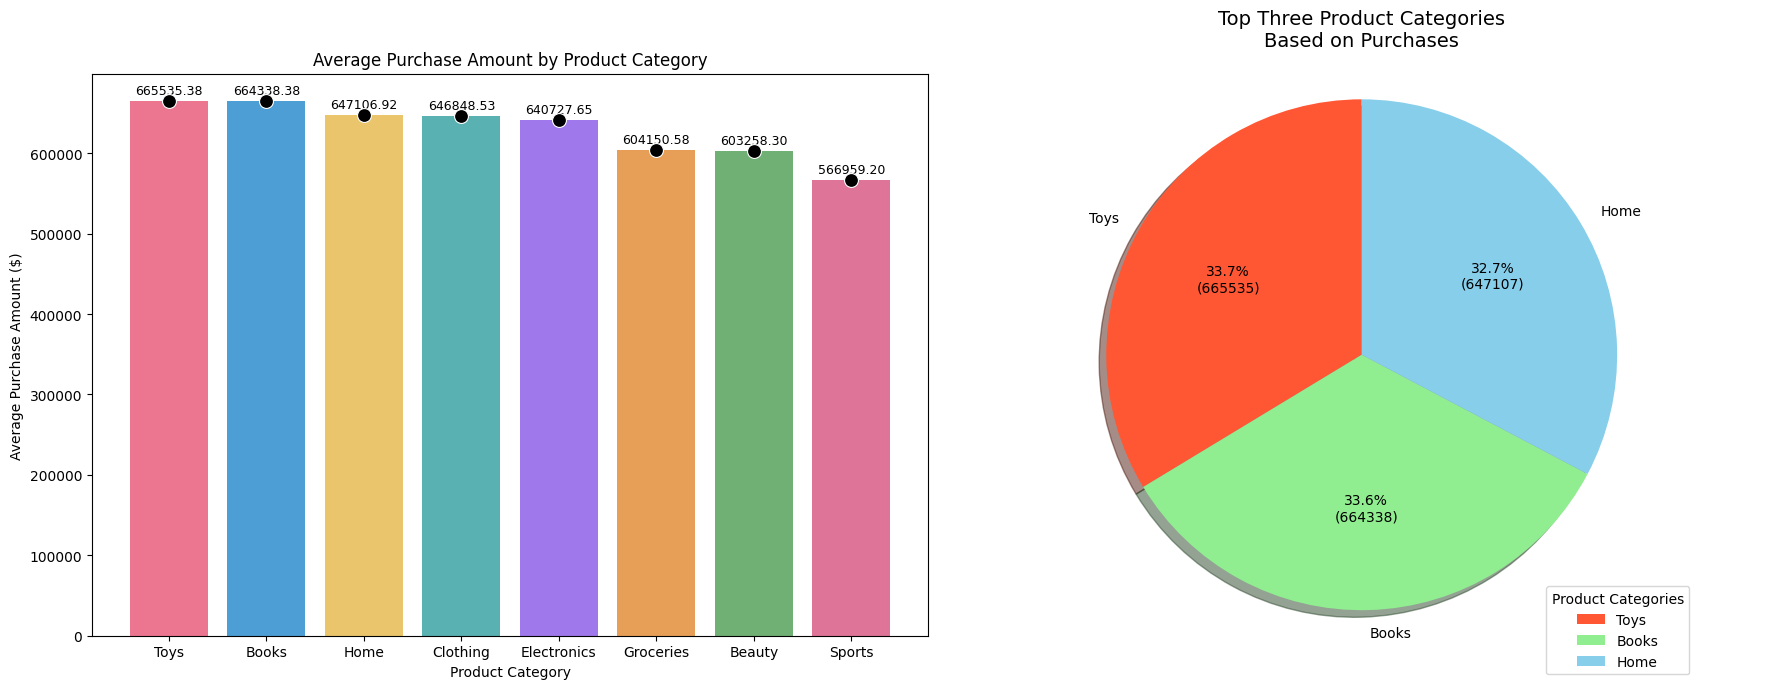

In [26]:
# Sample data (replace with your actual data)
total_subscription = avg

colors_pie = ['#FF5733', 'lightgreen', 'skyblue']
bar_palette = ['#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0', '#9966FF', '#FF9F40', '#66BB6A', '#F06292']

def func(pct, allvals):
    absolute = int(round(pct / 100. * sum(allvals)))
    return f"{pct:.1f}%\n({absolute})"

# ------------------ Create Side-by-Side Layout ------------------
fig, axes = plt.subplots(1, 2, figsize=(18, 7))  # 1 row, 2 columns

# -------- Left: BAR PLOT --------
sns.barplot(x=product1, y=avg1, hue=product1, palette=bar_palette, legend=False, ax=axes[0])
sns.scatterplot(x=product1, y=avg1, color='black', s=100, marker='o', zorder=10, ax=axes[0])

# Add value labels
for i, value in enumerate(avg1):
    axes[0].text(i, value + 5000, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

axes[0].set_title('Average Purchase Amount by Product Category')
axes[0].set_xlabel('Product Category')
axes[0].set_ylabel('Average Purchase Amount ($)')
axes[0].tick_params(axis='x')

# -------- Right: PIE CHART --------
axes[1].pie(
    avg,
    labels=product,
    autopct=lambda pct: func(pct, total_subscription),
    startangle=90,
    colors=colors_pie,
    shadow=True,
    labeldistance=1.09
)
axes[1].axis('equal')
axes[1].set_title("Top Three Product Categories\nBased on Purchases", fontsize=14, pad=20)
axes[1].legend(product, title="Product Categories", loc="upper right", bbox_to_anchor=(0.9, 0.1))

plt.tight_layout()
plt.savefig('bar_pie_side_by_side.png')
plt.show()


Q 4: How many customers are classified as return customers? 

In [27]:
return_customer = df['Return Customer'].sum()
print(f'Number of return customers : ',return_customer )

Number of return customers :  4996


Explanation:

In Pandas, True is treated as 1 and False as 0.

So .sum() counts the number of True values directly.

MAKING TWO SERIES LISTS OUT OF RETURN CUSTOMERS UNIQUE VALUE COUNTS

In [28]:
customers = pd.Series(df['Return Customer'].value_counts(),name='count')
label_map = {True: 'Return Customer', False : 'Non Return Customer'}
customers.index = customers.index.map(label_map)
customer_types = pd.Series(customers.index)
counts = pd.Series(customers.values)
print(customer_types)
print(counts)

0    Non Return Customer
1        Return Customer
Name: Return Customer, dtype: object
0    5004
1    4996
dtype: int64


VISUALISATION WITH A BAR CHART

49.96


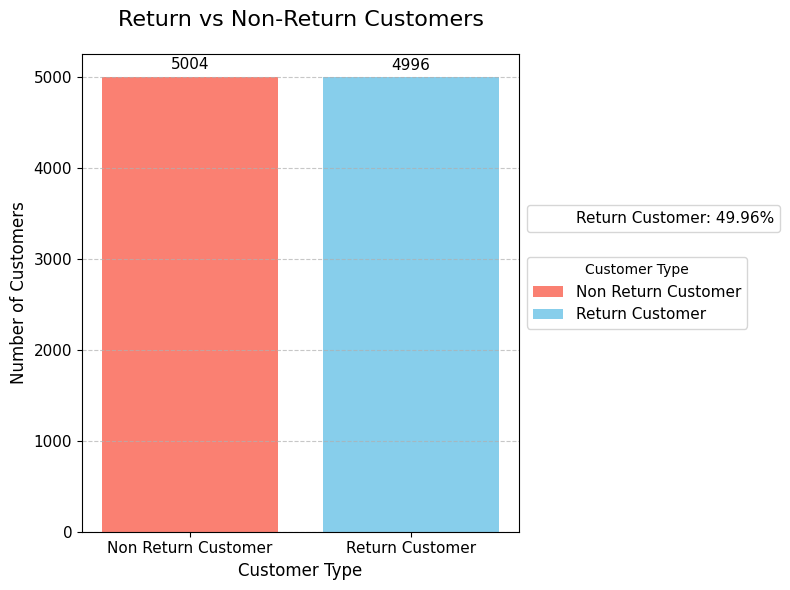

In [29]:
total = sum(counts)
return_percentage = (counts[1] / total) * 100  # Calculate return rate
print(return_percentage)

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(customer_types, counts, color=['salmon', 'skyblue'])

# Title and labels
plt.title("Return vs Non-Return Customers", fontsize=16, pad=20)
plt.xlabel("Customer Type", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50,
             f'{height}', ha='center', va='bottom', fontsize=11)

# Gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# First legend: Bar categories
main_legend = plt.legend(bars, customer_types, title="Customer Type",
                         loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=11)

# Extra legend: Return rate percentage
extra_patch = Patch(color='none', label=f"Return Customer: {return_percentage:.2f}%")
plt.legend(handles=[extra_patch], loc='upper left', fontsize=11, frameon=True,bbox_to_anchor=(1.0, 0.7))

# Show both legends
plt.gca().add_artist(main_legend)

# Ticks and layout
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

Q 5: What is the average review score given by customers? 

In [30]:
avg_review_score = df['Review Score (1-5)'].mean()
print(f"Average review score given by customers : ", avg_review_score)

Average review score given by customers :  2.9951


Q 6: How does the average delivery time vary between subscription statuses (Free, Premium)? 

In [31]:
# Filter Subscription Statufor Free and Premium only
filtered_df = df[df['Subscription Status'].isin(['Free', 'Premium'])]

# Group by and calculate mean delivery time
avg_delivery_time = filtered_df.groupby('Subscription Status')['Delivery Time (days)'].mean().round(3)

print(avg_delivery_time)

Subscription Status
Free       6.964
Premium    7.070
Name: Delivery Time (days), dtype: float64


MAKING TWO SERIES LISTS OUT OF THIS GROUPBY FUNCTIONS

In [32]:
Free = pd.Series(avg_delivery_time.index)
Premium = pd.Series(avg_delivery_time.values).round(2)
print(Free)
print(Premium)

0       Free
1    Premium
Name: Subscription Status, dtype: object
0    6.96
1    7.07
dtype: float64


VISUALISATION WITH A BAR CHART

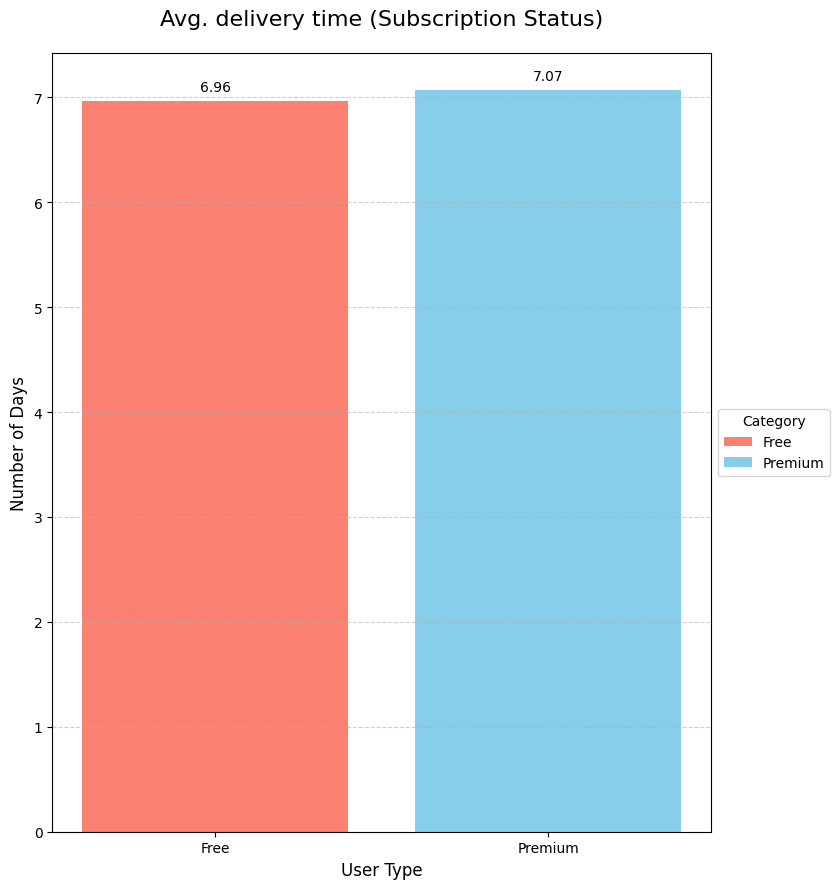

In [33]:
colors = ['salmon', 'skyblue']

plt.figure(figsize=(10, 9))


# Create bars with color
bars = plt.bar(Free, Premium, color=colors)

# Add title and axis labels
plt.title("Avg. delivery time (Subscription Status)", fontsize=16, pad=20)
plt.xlabel("User Type", fontsize=12)
plt.ylabel("Number of Days", fontsize=12)

# Add value labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.07,         # a little above the bar
             str(bar.get_height()),
             ha='center', va='bottom')

# Add a custom legend manually using bar handles
plt.legend(bars, Free, title="Category", loc='center left', bbox_to_anchor=(1.0, 0.5))

# Gridlines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Make space for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

Q 7: How many customers are subscribed to the service? 

In [34]:
df['Subscription Status'].value_counts()

Subscription Status
Premium    3369
Free       3354
Trial      3277
Name: count, dtype: int64

In [35]:
# Filter out customers with a valid subscription
subscribed_customers = df[df['Subscription Status'].isin(['Premium'])]

# Count unique subscribed customers
num_subscribed = subscribed_customers['Customer ID'].nunique()

print("Number of subscribed customers:", num_subscribed)

Number of subscribed customers: 3369


MAKING TWO SERIES LIST FROM SUBSCRIPTION COLUMNS

In [36]:
num_subscribed = df['Subscription Status'].value_counts()
subscription_types = pd.Series(num_subscribed.index)
total_subscription = pd.Series(num_subscribed.values)
print(subscription_types)
print(total_subscription)

0    Premium
1       Free
2      Trial
Name: Subscription Status, dtype: object
0    3369
1    3354
2    3277
dtype: int64


RENAMING THE PREMIUM TO SUBSCRIBED CUSTOMERS

In [37]:
# renaming the premium subscription to subscribed customerd
subscription_types = pd.Series(num_subscribed.index).replace('Premium', 'Subscribed Customers')
print(subscription_types)

0    Subscribed Customers
1                    Free
2                   Trial
Name: Subscription Status, dtype: object


PIE VISUALIZATION 

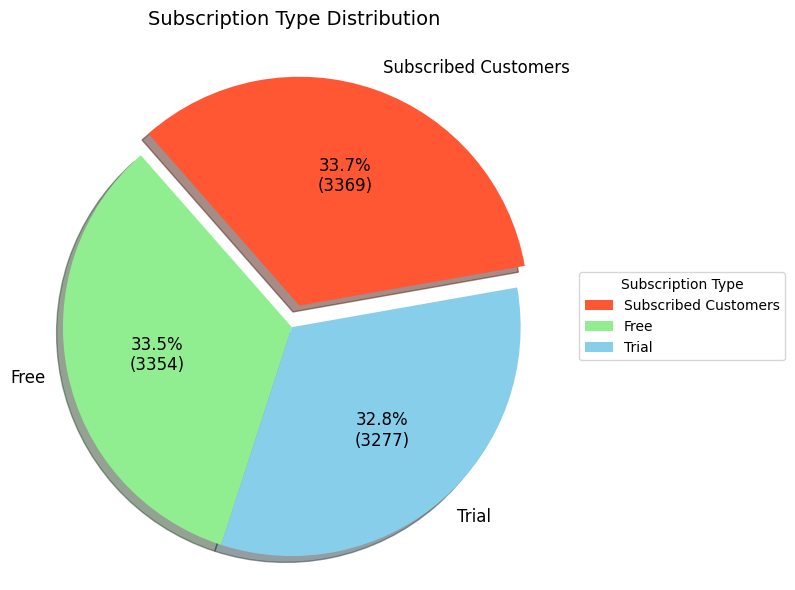

In [38]:
plt.figure(figsize=(8, 6))
colors = ['#FF5733', 'lightgreen', 'skyblue']

explodes = [0.1,0,0]

def func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{pct:.1f}%\n({absolute})"

# Plot pie chart with enhancements
plt.pie(total_subscription,
        labels=subscription_types,
        colors=colors,
        autopct=lambda pct: func(pct, total_subscription),       # Show percentage
        startangle=10,          # Rotate start angle for better layout
        shadow=True,
        labeldistance=1.1,
       explode=explodes,
        textprops={'fontsize': 12})       # Push labels slightly outward

# Title
plt.title("Subscription Type Distribution", fontsize=14, pad=20)

# Optional: Add legend
plt.legend(subscription_types, title="Subscription Type", loc="center left", bbox_to_anchor=(1.0, 0.5))

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Layout
plt.tight_layout()
plt.show()

Q 8: What percentage of customers used devices to make purchases? (Mobile, Desktop, Tablet) 

In [43]:
devices = df['Device Type'].value_counts()
devices_percentages = (devices/devices.sum())*100
print(f"Percntage of customers used devices to make purchase by", devices_percentages)

Percntage of customers used devices to make purchase by Device Type
Mobile     33.74
Desktop    33.48
Tablet     32.78
Name: count, dtype: float64


MAKING TWO SERIES LISTS FOR VISUAL PRESENTATION

In [121]:
device_list = pd.Series(devices_percentages.index)
percentage =  pd.Series(devices_percentages.values)

PIE VISUAL PRESENTATION FOR THIS QUERY

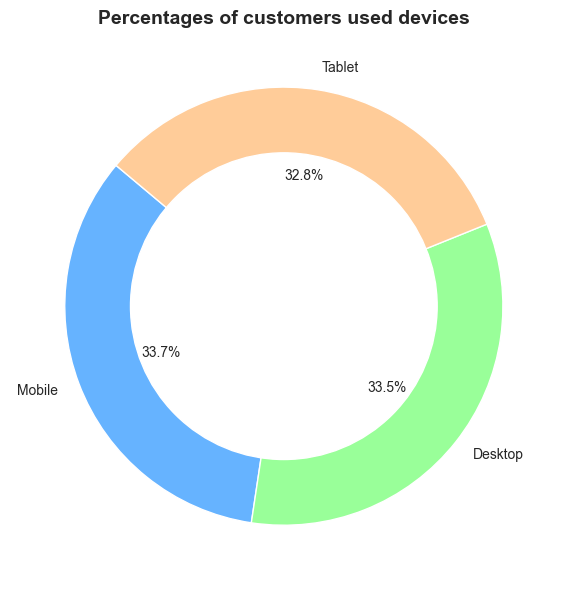

In [122]:
# Define colors
colors = ['#66b3ff', '#99ff99', '#ffcc99']

# Create pie chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    percentage,
    labels=device_list,
    colors=colors,
    autopct='%.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

# Add title
plt.title('Percentages of customers used devices', fontsize=14, fontweight='bold')


# Improve font
for text in texts + autotexts:
    text.set_fontsize(10)

# Optional: Turn into donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Show plot
plt.tight_layout()
plt.show()

Q 9: What is the average purchase amount for customers who availed discounts compared to those who didnʼt? 

In [46]:
average_purchase = df.groupby('Discount Availed')['Purchase Amount ($)'].mean().round(2)
print(average_purchase)
average_purchase.index = ['Discount Didn\'t Use', 'Discount Used']

print("Average Purchase Amount:")
print(average_purchase)

Discount Availed
False    502.51
True     505.26
Name: Purchase Amount ($), dtype: float64
Average Purchase Amount:
Discount Didn't Use    502.51
Discount Used          505.26
Name: Purchase Amount ($), dtype: float64


MAKING TWO SERIES LIST FOR BAR CHART VISUALIZATION

In [47]:
discount = pd.Series(average_purchase.index)
avg = pd.Series(average_purchase.values)

BAR CHART VISUALIZATION 

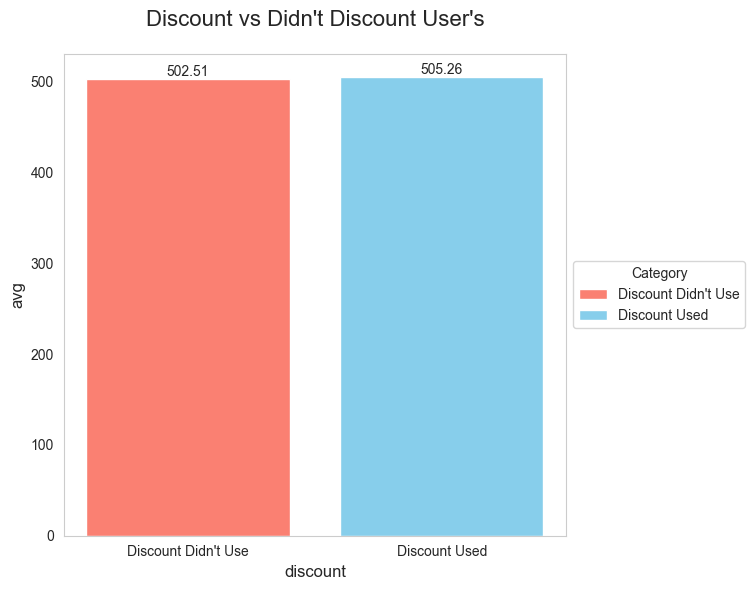

In [151]:
colors = ['salmon', 'skyblue']

plt.figure(figsize=(9, 6))


# Create bars with color
bars = plt.bar(discount,avg, color=colors)

# Add title and axis labels
plt.title("Discount vs Didn't Discount User's", fontsize=16, pad=20)
plt.xlabel("discount", fontsize=12)
plt.ylabel("avg", fontsize=12)

# Add value labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.07,         # a little above the bar
             str(bar.get_height()),
             ha='center', va='bottom')

# Add a custom legend manually using bar handles
plt.legend(bars, discount, title="Category", loc='center left', bbox_to_anchor=(1.0, 0.5))

# Gridlines
plt.grid(False)
plt.savefig("Discount_vs_Didn't_Discount_User's.png", dpi=300)

# Make space for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig("Discount_vs_Didn't_Discount_User's.png", dpi=300)
plt.show()

Q 10: What is the most common payment method used by customers? 

In [49]:
df['Payment Method'].value_counts()

Payment Method
Bank Transfer       2067
Credit Card         2028
Cash on Delivery    2007
Debit Card          1983
PayPal              1915
Name: count, dtype: int64

In [50]:
# Most common payment method
most_common_method = df['Payment Method'].mode()[0]

print("Most common payment method:", most_common_method)

Most common payment method: Bank Transfer


CREATING TWO SERIES LIST FOR BAR CHART VISUALIZATOIN

In [125]:
method = df['Payment Method'].value_counts()
payment_method = pd.Series(method.index)
total_payment = pd.Series(method.values)

BAR CHART VISUALIZATION

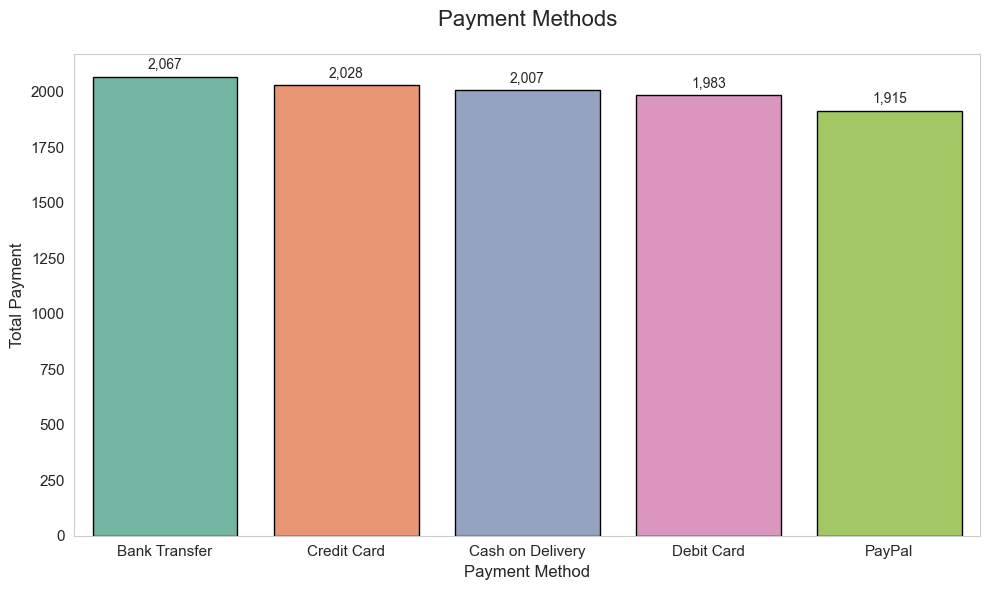

In [134]:
plt.figure(figsize=(10, 6))

# Barplot (hue set to x to fix deprecation warning)
ax = sns.barplot(
    x=payment_method,
    y=total_payment,
    hue=payment_method,
    data=df,
    palette='Set2',
    edgecolor='black',
    legend=False
)

# Add value labels on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(total_payment) * 0.01,  # small gap above bar
        f"{height:,.0f}",  # format with thousands separator
        ha='center', va='bottom', fontsize=10
    )

# Titles and labels
plt.title("Payment Methods", fontsize=16, pad=20)
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Total Payment", fontsize=12)

# Ticks and grid
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(False)

plt.tight_layout()
plt.show()


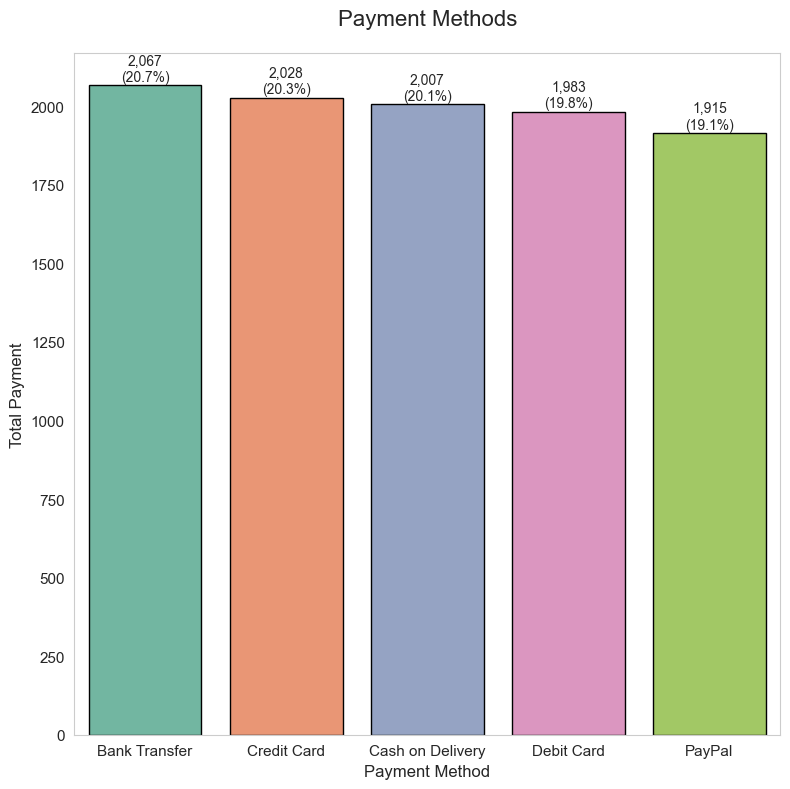

In [147]:
plt.figure(figsize=(8, 8))

# Total of all payments for percentage calculation
total_sum = sum(total_payment)

# Barplot (hue set to x to avoid warning)
ax = sns.barplot(
    x=payment_method,
    y=total_payment,
    hue=payment_method,
    data=df,
    palette='Set2',
    edgecolor='black',
    legend=False
)

# Add value + percentage on each bar
for bar in ax.patches:
    height = bar.get_height()
    percentage = (height / total_sum) * 100
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + total_sum * 0.0005,  # Adjust as needed
        f"{height:,.0f}\n({percentage:.1f}%)",  # Show value and % on two lines
        ha='center', va='bottom', fontsize=10
    )

# Titles and labels
plt.title("Payment Methods", fontsize=16, pad=20)
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Total Payment", fontsize=12)

# Ticks and grid
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(False)
plt.savefig("payment_method.png", dpi=300)

plt.tight_layout()
plt.show()


LEVEL 2: INTERMEDIATE INSIGHTS

Q 1: What are the average review scores of users of the most common payment method? 

In [53]:
# Altered df for most common payment method
# altered_df = df[df['Payment Method'].isin(['Free', 'Trail', 'Premium'])]

#altered_df
# avg_review_scores = altered_df.groupby('Payment Method')['Review Score (1-5)'].mean()

avg_review_scores = df.groupby('Payment Method')['Review Score (1-5)'].mean()
avg_review_scores

Payment Method
Bank Transfer       2.988873
Cash on Delivery    3.019930
Credit Card         2.970414
Debit Card          2.996974
PayPal              3.000000
Name: Review Score (1-5), dtype: float64

MAKING TWO SERIES LIST FOR BAR CHART

In [54]:
payment_method = pd.Series(avg_review_scores.index)
avg_review = pd.Series(avg_review_scores.values)
avg_review

0    2.988873
1    3.019930
2    2.970414
3    2.996974
4    3.000000
dtype: float64

BAR CHART VISUALIZATION

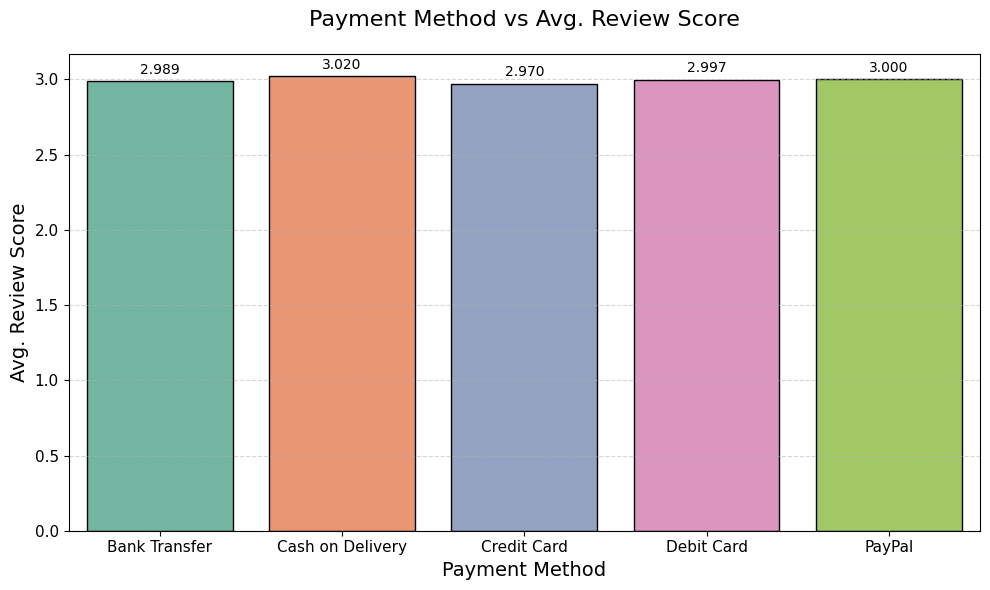

In [55]:
plt.figure(figsize=(10, 6))

# Barplot (hue set to x to fix deprecation warning)
ax = sns.barplot(
    x = payment_method,
    y = avg_review,
    hue = payment_method,
    data = df,
    palette = 'Set2',
    edgecolor = 'black',
    legend = False
)

# Add value labels on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(avg_review) * 0.01,  # small gap above bar
        f"{height:,.3f}",  # format with thousands separator
        ha='center', va='bottom', fontsize=10
    )

# Titles and labels
plt.title("Payment Method vs Avg. Review Score", fontsize=16, pad=20)
plt.xlabel("Payment Method", fontsize=14)
plt.ylabel("Avg. Review Score", fontsize=14)

# Ticks and grid
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Q 2: What is the correlation between time spent on the website and purchase amount? Do customers who spend more time on the website purchase more items? 

In [56]:
correlation = df['Time Spent on Website (min)'].corr(df['Purchase Amount ($)'])

print("Correlation between time spent and purchase amount:", correlation)

Correlation between time spent and purchase amount: 0.010024809958752734


HEXBIN VISUALIZATION

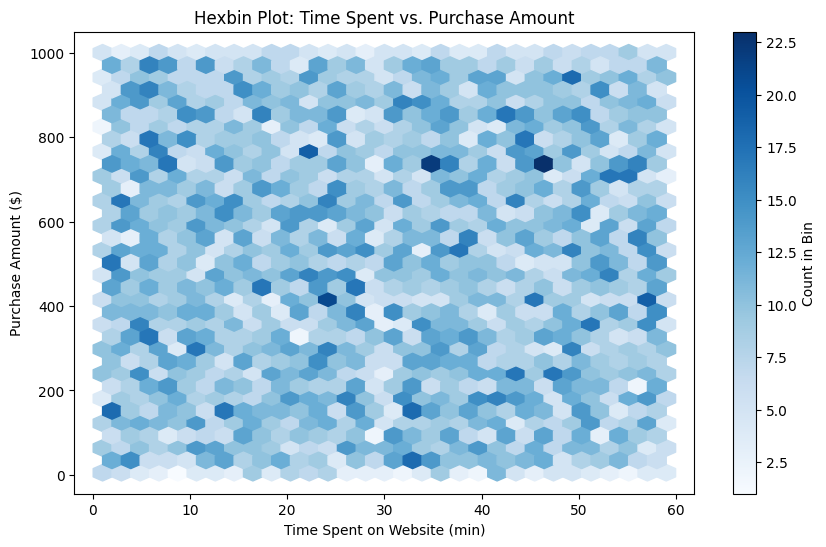

In [57]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['Time Spent on Website (min)'], df['Purchase Amount ($)'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.xlabel('Time Spent on Website (min)')
plt.ylabel('Purchase Amount ($)')
plt.title('Hexbin Plot: Time Spent vs. Purchase Amount')
plt.show()

SCATTERPLOT

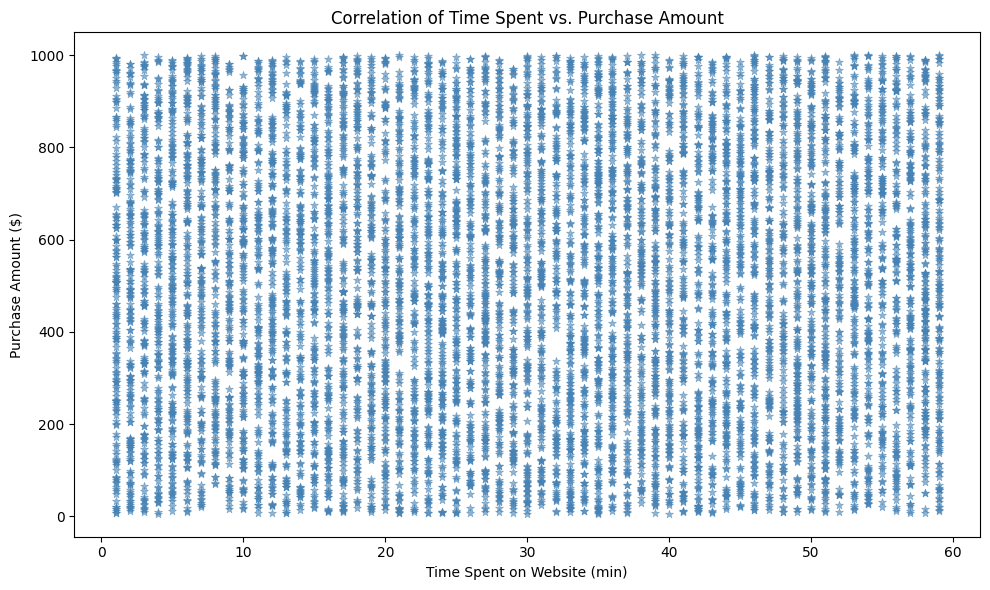

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Time Spent on Website (min)',
    y='Purchase Amount ($)',
    color='steelblue',
    alpha=0.6,
    edgecolor=None,
    marker ='*'
)
plt.xlabel('Time Spent on Website (min)')
plt.ylabel('Purchase Amount ($)')
plt.title('Correlation of Time Spent vs. Purchase Amount')
plt.tight_layout()
plt.show()

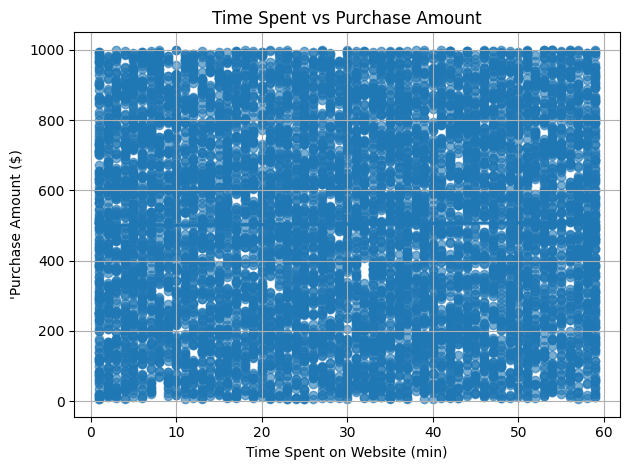

In [59]:
sns.regplot(data=df, x=df['Time Spent on Website (min)'], y=df['Purchase Amount ($)'], scatter_kws={'alpha':0.6})
plt.title("Time Spent vs Purchase Amount")
plt.xlabel("Time Spent on Website (min)")
plt.ylabel("'Purchase Amount ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

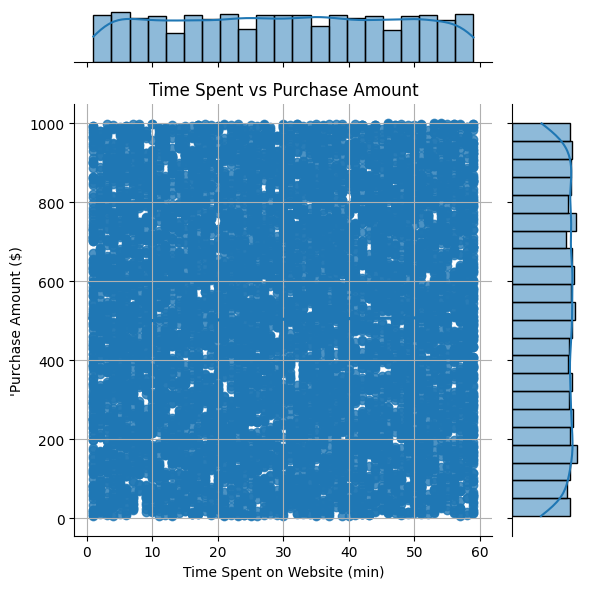

In [60]:
sns.jointplot(data=df, x=df['Time Spent on Website (min)'], y=df['Purchase Amount ($)'], kind='reg')
plt.title("Time Spent vs Purchase Amount")
plt.xlabel("Time Spent on Website (min)")
plt.ylabel("'Purchase Amount ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


Q 3: : What percentage of customers are satisfied (rating of 4 or 5) and are also return customers? 

In [61]:
# Filter for satisfied return customers
satisfied_returns = df[(df['Review Score (1-5)'] >= 4) & (df['Return Customer'] == True)]
# Total number of customers
# total_customers = len(df)

# Percentage
# percentage = (len(satisfied_returns) / total_customers) * 100

percentage = (len(satisfied_returns) / len(df)) *100

print(f"Percentage of satisfied return customers: {percentage:.2f}%")

Percentage of satisfied return customers: 20.08%


PIE CHART VISUALIZATION OF THE OUTPUT

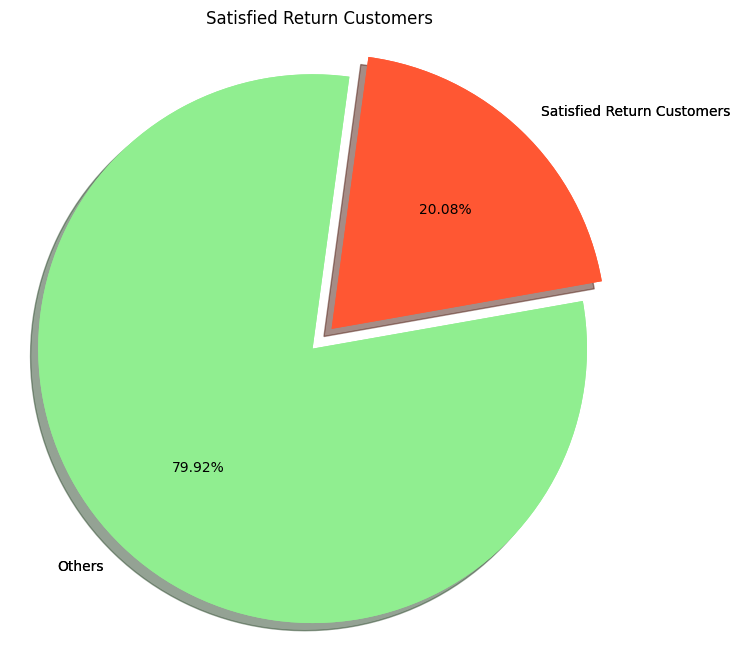

In [62]:
colors = ['#FF5733', 'lightgreen']

# Visualize
labels = ['Satisfied Return Customers', 'Others']
sizes = [len(satisfied_returns), len(df) - len(satisfied_returns)]
explodes =[0.1,0]
plt.figure(figsize=(8,8))

plt.pie(sizes,
        labels=labels,
        colors=colors,
        # autopct=lambda pct: func(pct, total_subscription),       # Show percentage
        startangle=10,          # Rotate start angle for better layout
        shadow=True,
        labeldistance=1.1,
       explode=explodes,
        textprops={'fontsize': 10}) 

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=10, explode = explodes)
plt.title('Satisfied Return Customers')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()

Q 4: What is the relationship between the number of items purchased and customer satisfaction? 

In [63]:
# Correlation between items purchased and satisfaction rating
#correlation = df['Number of Items Purchased'].corr(df['Customer Satisfaction'])

#print(f"Correlation between items purchased and customer satisfaction: {correlation:.2f}")
# Map satisfaction levels to numeric values

# as the column Customers Satisfavtion has object data types so to find co-relation between them we first need to convert them to numeric by using maping
satisfaction_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Customer Satisfaction Numeric'] = df['Customer Satisfaction'].map(satisfaction_mapping)

# Now compute the correlation
correlation = df['Number of Items Purchased'].corr(df['Customer Satisfaction Numeric'])
print(f"Correlation between items purchased and customer satisfaction: {correlation:.2f}")


Correlation between items purchased and customer satisfaction: -0.01


BAR PLOT VISUALIZATION

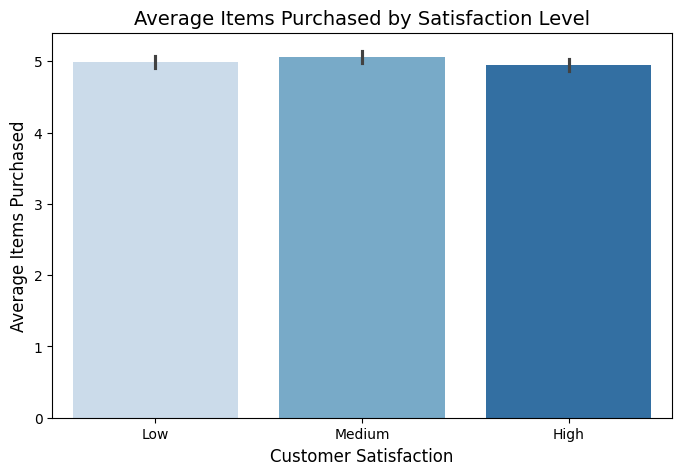

In [64]:
# Create bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Customer Satisfaction', y='Number of Items Purchased',hue = 'Customer Satisfaction', order=['Low', 'Medium', 'High'], palette='Blues')

# Add title and labels
plt.title('Average Items Purchased by Satisfaction Level', fontsize=14)
plt.xlabel('Customer Satisfaction', fontsize=12)
plt.ylabel('Average Items Purchased', fontsize=12)
plt.show()

BOXPLOT VISUALIZATION

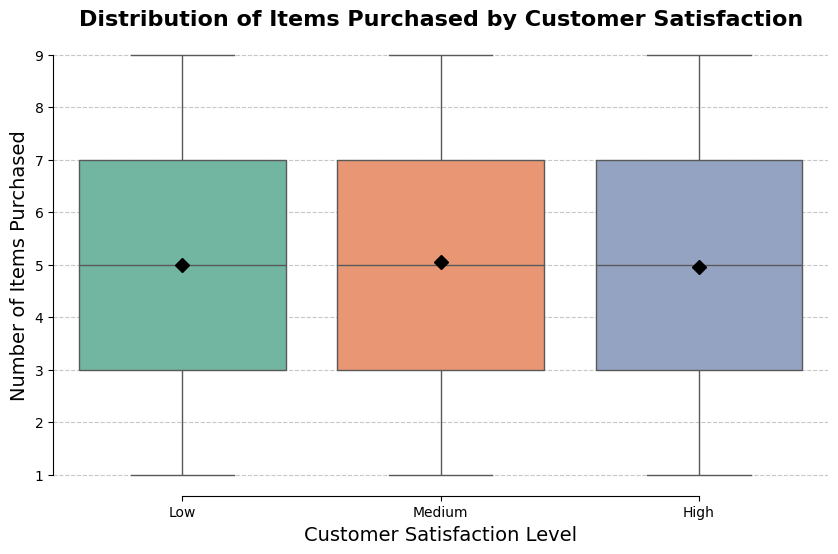

In [65]:
plt.figure(figsize=(10, 6))

# Create box plot
sns.boxplot(
    data=df,
    x='Customer Satisfaction',
    y='Number of Items Purchased',
    hue='Customer Satisfaction',          # Apply palette correctly
    palette='Set2',
    order=['Low', 'Medium', 'High'],      # Ensure consistent category order
    showmeans=True,                       # Show mean marker
    meanprops={
        'marker': 'D',                   # Diamond shape for mean
        'markerfacecolor': 'black',     
        'markeredgecolor': 'black',
        'markersize': 7
    },
    legend=False                         # Remove redundant legend
)



# Titles and labels
plt.title('Distribution of Items Purchased by Customer Satisfaction', fontsize=16, weight='bold')
plt.xlabel('Customer Satisfaction Level', fontsize=14)
plt.ylabel('Number of Items Purchased', fontsize=14)

# Grid and style tweaks
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(trim=True)

plt.show()

Q 5: Which location has the 2nd highest average purchase amount? 

In [66]:
# Group by location and calculate average purchase amount
avg_purchase_by_location = df.groupby('Location')['Purchase Amount ($)'].mean()
# print(avg_purchase_by_location)

# Sort in descending order
sorted_avg = avg_purchase_by_location.sort_values(ascending=False)

print(sorted_avg)

# Get the second highest
second_highest_location = sorted_avg.index[1]
second_highest_value = sorted_avg.iloc[1]

print(f"The location with the 2nd highest average purchase amount is: {second_highest_location} (${second_highest_value:.2f})")

Location
Khulna        513.937072
Barisal       513.674560
Mymensingh    507.892211
Chittagong    507.851675
Dhaka         502.002504
Rajshahi      495.544649
Sylhet        494.976427
Rangpur       494.368867
Name: Purchase Amount ($), dtype: float64
The location with the 2nd highest average purchase amount is: Barisal ($513.67)


In [67]:
location = pd.Series(sorted_avg.index)
purchase_amount = pd.Series(sorted_avg.values).round(2).sort_values(ascending=False)
print(location)
print(purchase_amount)

0        Khulna
1       Barisal
2    Mymensingh
3    Chittagong
4         Dhaka
5      Rajshahi
6        Sylhet
7       Rangpur
Name: Location, dtype: object
0    513.94
1    513.67
2    507.89
3    507.85
4    502.00
5    495.54
6    494.98
7    494.37
dtype: float64


BAR PLOT VISUALIZATION

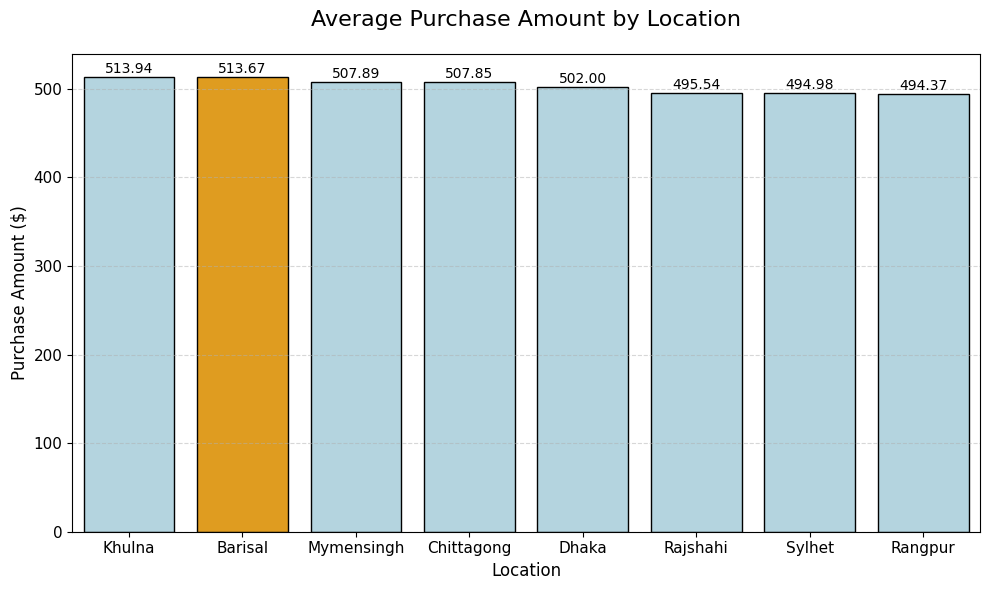

In [68]:
df_plot = pd.DataFrame({
    'Location': location,
    'Purchase Amount': purchase_amount
})

# Find second highest value
sorted_df = df_plot.sort_values(by='Purchase Amount', ascending=False).reset_index(drop=True)
second_highest_value = sorted_df.loc[1, 'Purchase Amount']
second_highest_location = sorted_df.loc[1, 'Location']

# Build custom color list
colors = []
for loc in df_plot['Location']:
    if loc == second_highest_location:
        colors.append('orange')  # Highlight second highest
    else:
        colors.append('lightblue')  # Default color

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_plot,
    x='Location',
    y='Purchase Amount',
    hue = location,
    palette=colors,
    edgecolor='black'
)

# Add value labels on top
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"{height:.2f}",
        ha='center', va='bottom', fontsize=10
    )

# Titles and labels
plt.title("Average Purchase Amount by Location", fontsize=16, pad=20)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Purchase Amount ($)", fontsize=12)

# Ticks and grid
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

 LEVEL 3: CRITICAL THINKING INSIGHTS

Q 1: What factors contribute most to a customer being classified as a return customer? 

In [69]:
# Separate data into return vs. non-return customers
returners = df[df['Return Customer'] == True]
non_returners = df[df['Return Customer'] == False]

# Select relevant numeric columns for comparison
columns_to_compare = [
    'Purchase Amount ($)', 'Time Spent on Website (min)', 'Number of Items Purchased',
    'Review Score (1-5)', 'Delivery Time (days)', 'Customer Satisfaction Numeric'
]

# Create a summary DataFrame
summary = pd.DataFrame({
    'Return Customers': returners[columns_to_compare].mean(),
    'Non-Return Customers': non_returners[columns_to_compare].mean()
})

# Calculate the difference
summary['Difference'] = summary['Return Customers'] - summary['Non-Return Customers']

print(summary.sort_values(by='Return Customers', ascending=False))

                               Return Customers  Non-Return Customers  \
Purchase Amount ($)                  504.443577            503.342292   
Time Spent on Website (min)           29.811449             30.025180   
Delivery Time (days)                   7.064852              6.961231   
Number of Items Purchased              5.000600              4.996403   
Review Score (1-5)                     3.007406              2.982814   
Customer Satisfaction Numeric          1.985588              2.002198   

                               Difference  
Purchase Amount ($)              1.101285  
Time Spent on Website (min)     -0.213731  
Delivery Time (days)             0.103621  
Number of Items Purchased        0.004198  
Review Score (1-5)               0.024592  
Customer Satisfaction Numeric   -0.016610  


HORIZENTAL BAR PLOT

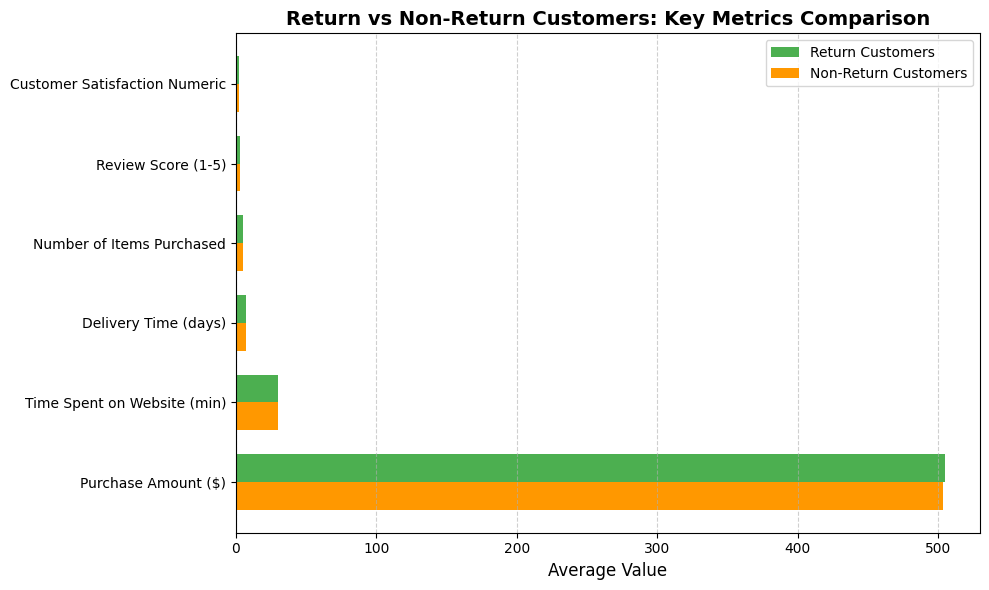

In [70]:
# Sort the summary table by 'Return Customers' (as you're already doing)
sorted_summary = summary.sort_values(by='Return Customers', ascending=False)

# Set up the plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
y = range(len(sorted_summary))

# Plot both bars
plt.barh(
    [i + bar_width for i in y],
    sorted_summary['Return Customers'],
    height=bar_width,
    color='#4CAF50',
    label='Return Customers'
)

plt.barh(
    y,
    sorted_summary['Non-Return Customers'],
    height=bar_width,
    color='#FF9800',
    label='Non-Return Customers'
)

# Y-axis labels and title
plt.yticks([i + bar_width / 2 for i in y], sorted_summary.index, fontsize=10)
plt.xlabel('Average Value', fontsize=12)
plt.title('Return vs Non-Return Customers: Key Metrics Comparison', fontsize=14, weight='bold')

# Add grid and legend
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()


Q 2: How do payment methods influence customer satisfaction and return rates? 

In [82]:
# Map satisfaction levels to numeric scores
satisfaction_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['Customer Satisfaction Numeric'] = df['Customer Satisfaction'].map(satisfaction_map)


# Group by payment method and calculate average satisfaction score
satisfaction_by_payment = df.groupby('Payment Method')['Customer Satisfaction Numeric'].mean().sort_values(ascending=False)
print(satisfaction_by_payment)

Payment Method
Bank Transfer       2.011611
Credit Card         2.002959
Debit Card          2.002017
PayPal              1.990078
Cash on Delivery    1.962133
Name: Customer Satisfaction Numeric, dtype: float64


This shows which payment methods are associated with higher customer satisfaction. You might find that more streamlined or trusted methods—like Credit Card or Bank Transfer—yield better scores.


In [83]:
# Calculate return rate per payment method
return_rate_by_payment = df.groupby('Payment Method')['Return Customer'].mean().sort_values(ascending=False)
sorted_data = return_rate_by_payment.sort_values() * 100
print(return_rate_by_payment)

Payment Method
Credit Card         0.512327
Bank Transfer       0.506047
PayPal              0.498695
Debit Card          0.491175
Cash on Delivery    0.489287
Name: Return Customer, dtype: float64


This gives the percentage of customers who returned, grouped by payment method. A higher value means more repeat business.


BAR PLOT VISUALIZATION OF RETURN RATE BY PAYMENT METHOD

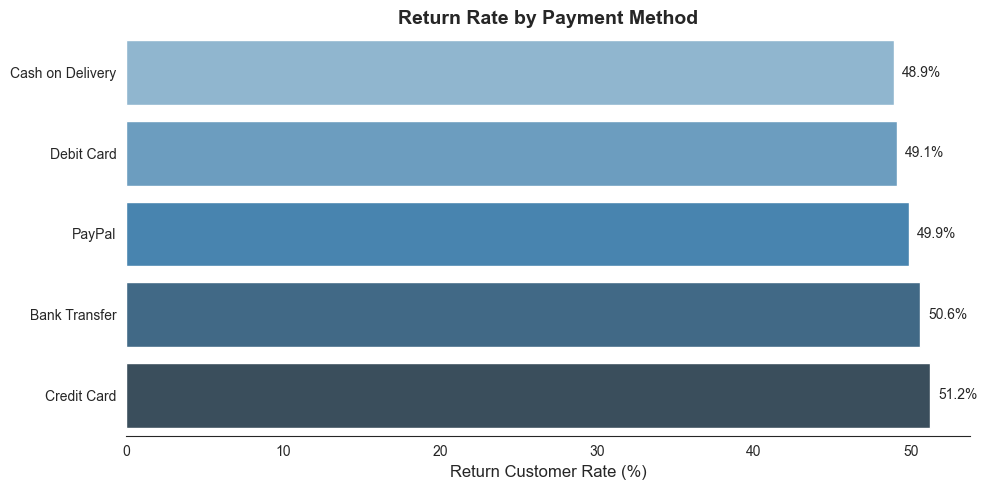

In [92]:
# Sort the data
# Assume return_rate_by_payment is a Series (0–1), convert to percent and sort
sorted_data = return_rate_by_payment.sort_values() * 100
df_return = sorted_data.reset_index()
df_return.columns = ['Payment Method', 'Return Rate (%)']

# Seaborn plot
plt.figure(figsize=(10, 5))
sns.set_style("white")

ax = sns.barplot(
    data=df_return,
    y='Payment Method',
    x='Return Rate (%)',
    palette='Blues_d',
    hue = 'Payment Method',
    legend  = False
)

# Title and labels
ax.set_title('Return Rate by Payment Method', fontsize=14, weight='bold')
ax.set_xlabel('Return Customer Rate (%)', fontsize=12)
ax.set_ylabel('')

# Grid and spines
ax.xaxis.grid(False)
ax.yaxis.grid(False)
sns.despine(left=True, top=True, right=True)

# Add data labels
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.5,                     # Slightly offset right
            p.get_y() + p.get_height()/2,    # Vertically centered
            f'{width:.1f}%',                 # % format
            va='center', ha='left', fontsize=10)

# Ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


BAR PLOT PRESENTATION OF AVG. CUSTOMERS SATISFACTION BY PAYMENT METHOD

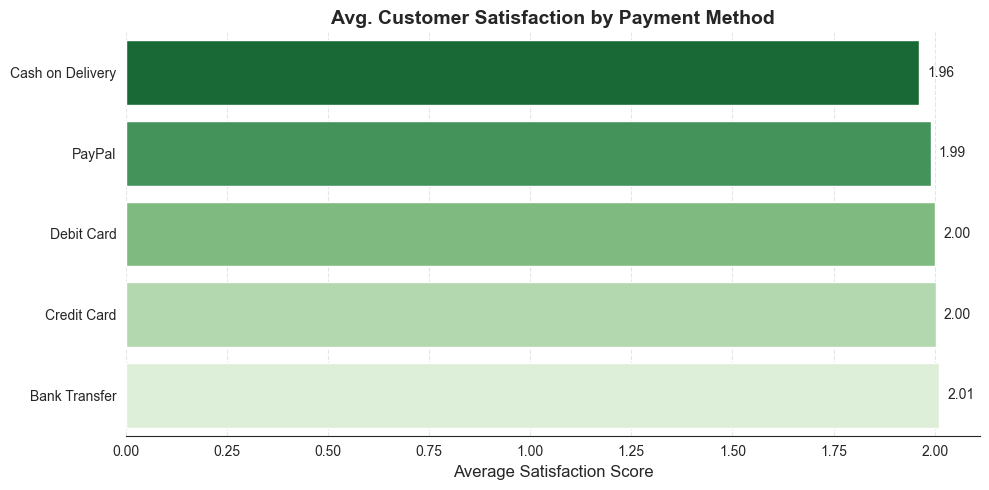

In [89]:
# Sort the data (optional, for better visual flow)
# Sort and prepare data
sorted_satisfaction = satisfaction_by_payment.sort_values()
df_return = sorted_satisfaction.reset_index()
df_return.columns = ['Payment Method', 'Satisfaction']

# Plot
plt.figure(figsize=(10, 5))
sns.set_style("white")

ax = sns.barplot(
    data=df_return,
    y='Payment Method',
    x='Satisfaction',
    palette='Greens_r',
    hue = 'Payment Method', 
    legend = False
)

# Title and axis labels
ax.set_title('Avg. Customer Satisfaction by Payment Method', fontsize=14, weight='bold')
ax.set_xlabel('Average Satisfaction Score', fontsize=12)
ax.set_ylabel('')  # Clean look

# Add horizontal gridlines only
ax.xaxis.grid(True, linestyle='--', alpha=0.5)
ax.yaxis.grid(False)

# Remove top and right spines
sns.despine(left=True, top=True, right=True)

# Add value labels to bars
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.02,
            p.get_y() + p.get_height() / 2,
            f'{width:.2f}',
            va='center', ha='left', fontsize=10)

# Ticks formatting
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


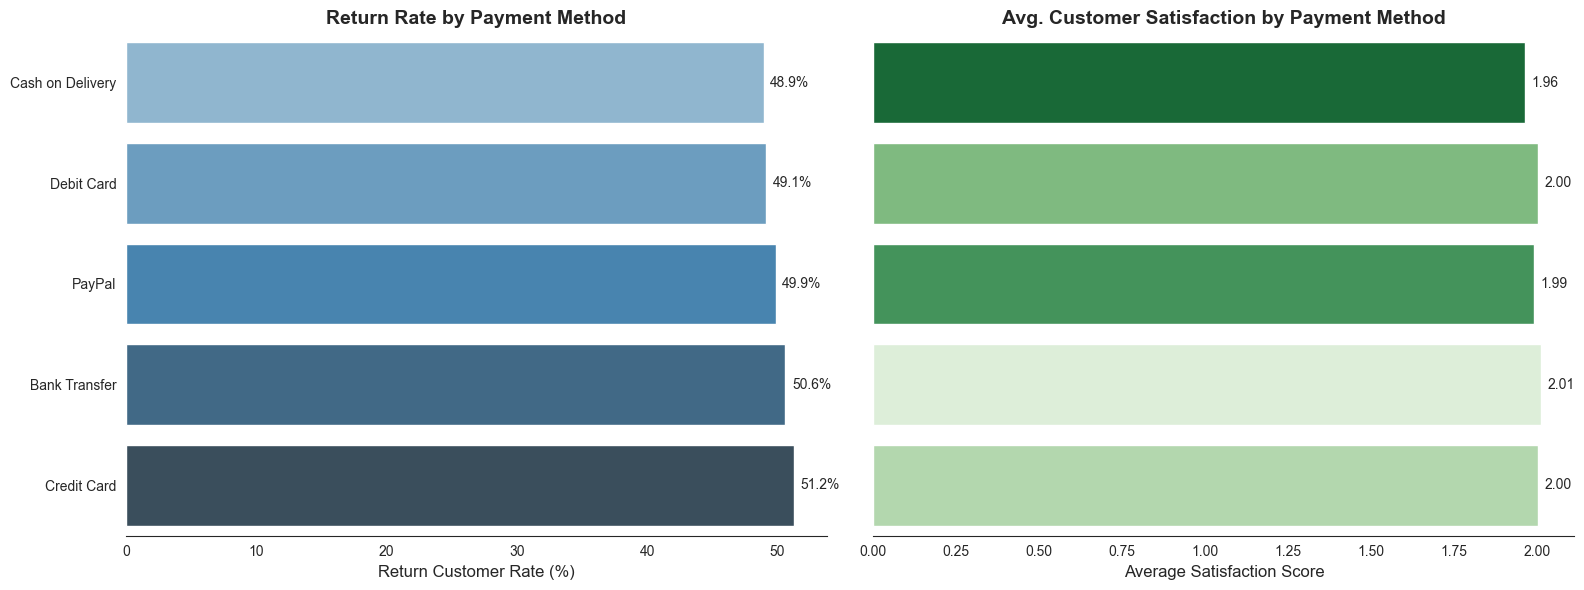

In [95]:
# Sort and format Return Rate data
sorted_return = return_rate_by_payment.sort_values() * 100
df_return = sorted_return.reset_index()
df_return.columns = ['Payment Method', 'Return Rate (%)']

# Sort and format Satisfaction data
sorted_satisfaction = satisfaction_by_payment.sort_values()
df_satisfaction = sorted_satisfaction.reset_index()
df_satisfaction.columns = ['Payment Method', 'Satisfaction']

# --- Create Subplots ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.set_style("white")

# --- Subplot 1: Return Rate ---
sns.barplot(
    data=df_return,
    y='Payment Method',
    x='Return Rate (%)',
    palette='Blues_d',
    hue='Payment Method',
    legend=False,
    ax=ax1
)
ax1.set_title('Return Rate by Payment Method', fontsize=14, weight='bold')
ax1.set_xlabel('Return Customer Rate (%)', fontsize=12)
ax1.set_ylabel('')
ax1.xaxis.grid(False)
ax1.yaxis.grid(False)
sns.despine(ax=ax1, left=True, top=True, right=True)

# Add value labels
for p in ax1.patches:
    width = p.get_width()
    ax1.text(width + 0.5,
             p.get_y() + p.get_height() / 2,
             f'{width:.1f}%',
             va='center', ha='left', fontsize=10)

# --- Subplot 2: Satisfaction Score ---
sns.barplot(
    data=df_satisfaction,
    y='Payment Method',
    x='Satisfaction',
    palette='Greens_r',
    hue='Payment Method',
    legend=False,
    ax=ax2
)
ax2.set_title('Avg. Customer Satisfaction by Payment Method', fontsize=14, weight='bold')
ax2.set_xlabel('Average Satisfaction Score', fontsize=12)
ax2.set_ylabel('')
ax2.xaxis.grid(False)
ax2.yaxis.grid(False)
sns.despine(ax=ax2, left=True, top=True, right=True)

# Add value labels
for p in ax2.patches:
    width = p.get_width()
    ax2.text(width + 0.02,
             p.get_y() + p.get_height() / 2,
             f'{width:.2f}',
             va='center', ha='left', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


Q 3:How does the location influence both purchase amount and delivery time? 

In [96]:
location_stats = df.groupby('Location')[['Purchase Amount ($)', 'Delivery Time (days)']].mean().sort_values(by='Purchase Amount ($)', ascending=False)
print(location_stats)

            Purchase Amount ($)  Delivery Time (days)
Location                                             
Khulna               513.937072              6.811774
Barisal              513.674560              7.072800
Mymensingh           507.892211              7.099219
Chittagong           507.851675              7.020440
Dhaka                502.002504              6.941957
Rajshahi             495.544649              7.113130
Sylhet               494.976427              7.018593
Rangpur              494.368867              7.031125


BAR PLOT VISUALIZATION

AVERAGE PURCHASE AMMOUNT BY LOCATION WITH DELIVERY TIME VISUALIZATION

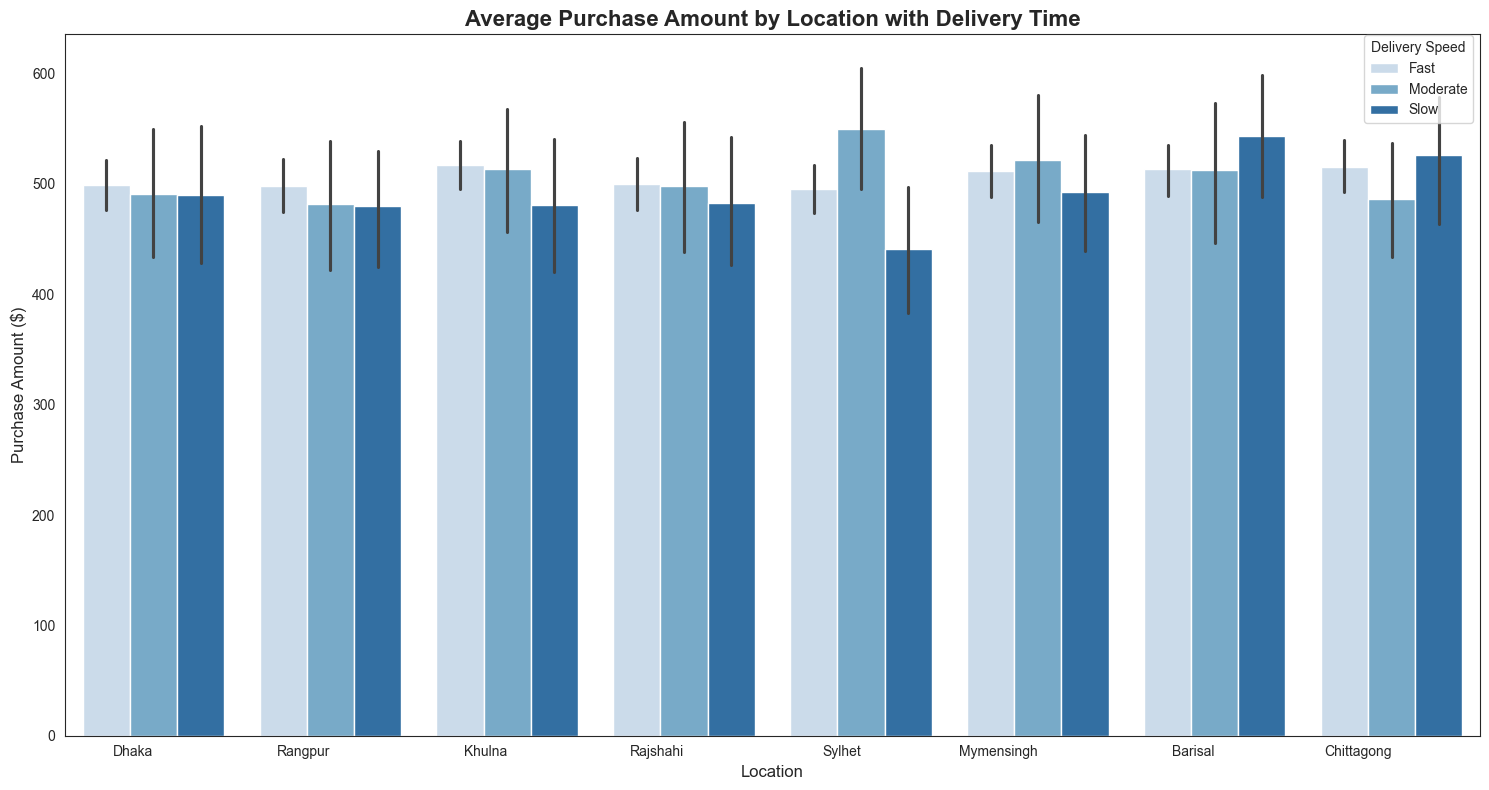

In [110]:
bins = [0, 6.9, 7.05, 8]
labels = ['Fast', 'Moderate', 'Slow']
df['Delivery Speed'] = pd.cut(df['Delivery Time (days)'], bins=bins, labels=labels)

plt.figure(figsize=(15, 8))
sns.barplot(data=df, x='Location', y='Purchase Amount ($)', hue='Delivery Speed', palette='Blues')

plt.title('Average Purchase Amount by Location with Delivery Time', fontsize=16, weight='bold')
plt.ylabel('Purchase Amount ($)', fontsize=12)
plt.xlabel('Location', fontsize=12)

plt.xticks(ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.legend(title='Delivery Speed', loc='upper right',bbox_to_anchor=(1.0, 1.009))  # Legend placed at upper right

#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



AVERAGE DELIVERY TIME BY LOCATION VISUALIZATION

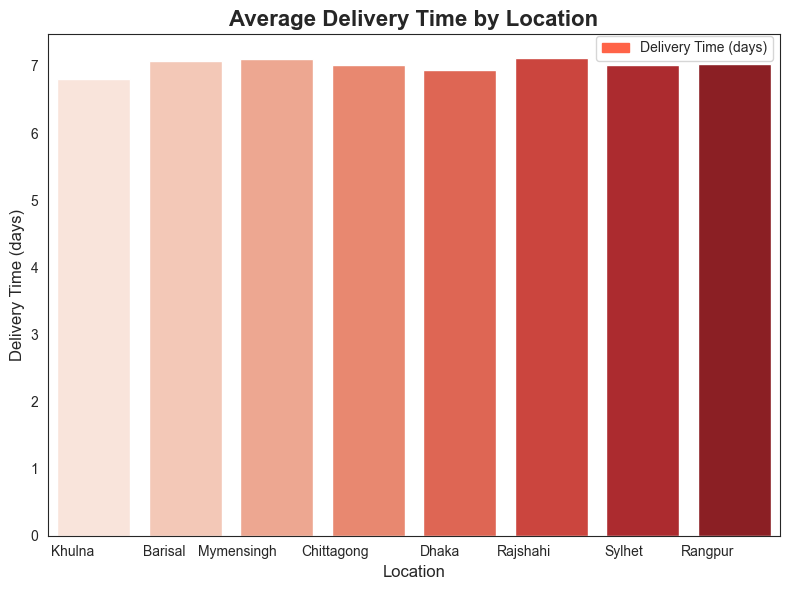

In [118]:
plt.figure(figsize=(8, 6))
sns.barplot(x=location_stats.index, y=location_stats['Delivery Time (days)'], palette='Reds', hue=location_stats.index )

plt.title('Average Delivery Time by Location', fontsize=16, weight='bold')
plt.ylabel('Delivery Time (days)', fontsize=12)
plt.xlabel('Location', fontsize=12)

plt.xticks(ha='right', fontsize=10)
plt.yticks(fontsize=10)
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Create a custom legend
red_patch = mpatches.Patch(color='tomato', label='Delivery Time (days)')
plt.legend(handles=[red_patch], loc='upper right',bbox_to_anchor=(1.0, 1.011))

plt.tight_layout()
plt.show()


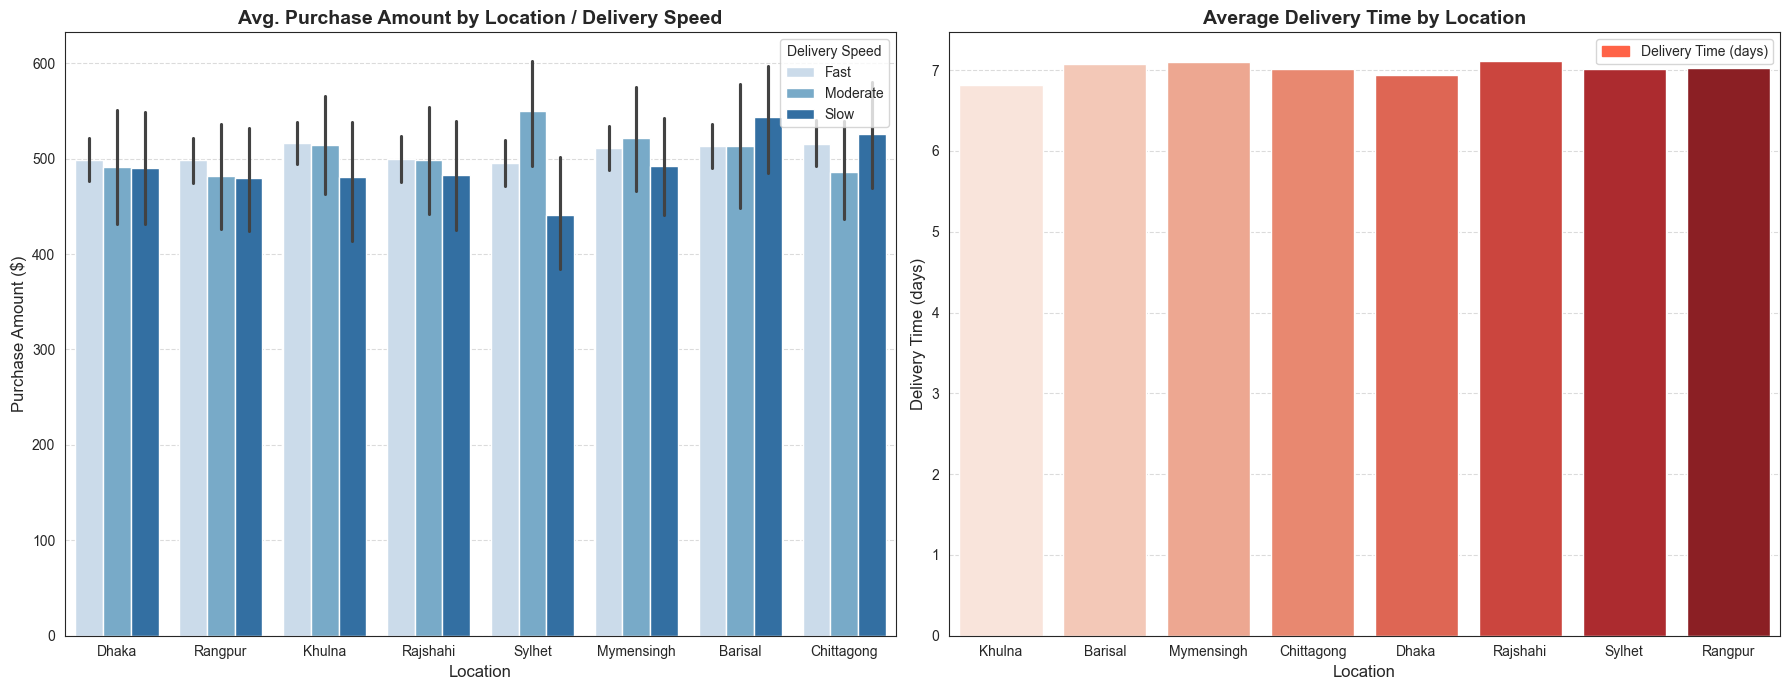

In [119]:
bins = [0, 6.9, 7.05, 8]
labels = ['Fast', 'Moderate', 'Slow']
df['Delivery Speed'] = pd.cut(df['Delivery Time (days)'], bins=bins, labels=labels)

# --- Create Subplots ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

sns.set_style("whitegrid")

# --- Subplot 1: Purchase Amount by Location with Delivery Speed ---
sns.barplot(
    data=df,
    x='Location',
    y='Purchase Amount ($)',
    hue='Delivery Speed',
    palette='Blues',
    ax=ax1
)
ax1.set_title('Avg. Purchase Amount by Location / Delivery Speed', fontsize=14, weight='bold')
ax1.set_xlabel('Location', fontsize=12)
ax1.set_ylabel('Purchase Amount ($)', fontsize=12)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend(title='Delivery Speed', loc='upper right')

# --- Subplot 2: Delivery Time by Location ---
sns.barplot(
    x=location_stats.index,
    y=location_stats['Delivery Time (days)'],
    palette='Reds',
    hue = location_stats.index,
    legend = False,
    ax=ax2
)

ax2.set_title('Average Delivery Time by Location', fontsize=14, weight='bold')
ax2.set_xlabel('Location', fontsize=12)
ax2.set_ylabel('Delivery Time (days)', fontsize=12)
ax2.tick_params(axis='x',labelsize=10)
ax2.tick_params(axis='y', labelsize=10)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Custom legend (since hue duplicates are not meaningful here)
red_patch = mpatches.Patch(color='tomato', label='Delivery Time (days)')
ax2.legend(handles=[red_patch], loc='upper right')

plt.tight_layout()
plt.show()